In [117]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import statsmodels.api as sma

In [274]:
df = pd.read_csv('vgsales.csv')


In [119]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [120]:
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [121]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [275]:
df.dropna(subset=['Year', 'Publisher'], inplace= True)

In [270]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [124]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [271]:
df.replace('Wii', 1, inplace= True)
df.replace('NES', 2, inplace= True)
df.replace('GB', 3, inplace= True)
df.replace('DS', 4, inplace= True)
df.replace('X360', 5, inplace= True)
df.replace('PS3', 6, inplace= True)
df.replace('PS2', 7, inplace= True)
df.replace('SNES', 8, inplace= True)
df.replace('GBA', 9, inplace= True)
df.replace('3DS', 10, inplace= True)
df.replace('PS4', 11, inplace= True)
df.replace('N64', 12, inplace= True)
df.replace('PS', 13, inplace= True)
df.replace('XB', 14, inplace= True)
df.replace('PC', 15, inplace= True)
df.replace('2600', 16, inplace= True)
df.replace('PSP', 17, inplace= True)
df.replace('XOne', 18, inplace= True)
df.replace('GC', 19, inplace= True)
df.replace('WiiU', 20, inplace= True)
df.replace('GEN', 21, inplace= True)
df.replace('DC', 22, inplace= True)
df.replace('PSV', 23, inplace= True)
df.replace('SAT', 24, inplace= True)
df.replace('SCD', 25, inplace= True)
df.replace('WS', 26, inplace= True)
df.replace('NG', 27, inplace= True)
df.replace('TG16', 28, inplace= True)
df.replace('3DO', 29, inplace= True)
df.replace('GG', 30, inplace= True)
df.replace('PCFX', 31, inplace= True)

1 = wii 2=nes 3= Game Boy 4= DS 5=Xbox 360 6= PS3 7= PS2 8= SNES 9= GBA 10=3DS 11=PS4 12=N64 13=Play Station 14=Xbox 15=PC 16=2600 17=PSP 18=Xbox One
19=Game Cube 20=WiiU 21=GEN 22=DC 23=PSV 24=Saturn 25=SCD 26= WS 27=NG 28=TG16 29=3DO 30=GG 31=PCFX

In [126]:
df.Platform.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [272]:
df = df.astype({'Platform' : float})

In [128]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [276]:
df.replace('Sports', 1, inplace= True)
df.replace('Platform', 2, inplace= True)
df.replace('Racing', 3, inplace= True)
df.replace('Role-Playing', 4, inplace= True)
df.replace('Puzzle', 5, inplace= True)
df.replace('Misc', 6, inplace= True)
df.replace('Shooter', 7, inplace= True)
df.replace('Simulation', 8, inplace= True)
df.replace('Action', 9, inplace= True)
df.replace('Fighting', 10, inplace= True)
df.replace('Adventure', 11, inplace= True)
df.replace('Strategy', 12, inplace= True)

1=sports 2=platformer 3=raceing 4=RPG 5=puzzle 6=misc 7=shooter 8=simulation 9=action 10=fighting 11=adventure 12=strategy

In [130]:
df.Genre.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [277]:
df = df.astype({'Genre' : float})

In [132]:
df.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

In [133]:
pd.set_option("display.max_rows", 60)
uniqes = df['Publisher'].value_counts()
print(uniqes)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64


In [278]:
df.replace('Electronic Arts', 1, inplace= True)
df.replace('Activision', 2, inplace= True)
df.replace('Namco Bandai Games', 3, inplace= True)
df.replace('Ubisoft', 4, inplace= True)
df.replace('Konami Digital Entertainment', 5, inplace= True)
df.replace('THQ', 6, inplace= True)
df.replace('Nintendo', 7, inplace= True)
df.replace('Sony Computer Entertainment', 8, inplace= True)
df.replace('Sega', 9, inplace= True)
df.replace('Take-Two Interactive', 10, inplace= True)
df.replace('Capcom', 11, inplace= True)
df.replace('Atari', 12, inplace= True)
df.replace('Tecmo Koei', 13, inplace= True)
df.replace('Square Enix', 14, inplace= True)
df.replace('Warner Bros. Interactive Entertainment', 15, inplace= True)
df.replace('Disney Interactive Studios', 16, inplace= True)
df.replace('Midway Games', 17, inplace= True)
df.replace('Eidos Interactive', 18, inplace= True)
df.replace('505 Games', 19, inplace= True)
df.replace('Microsoft Game Studios', 20, inplace= True)
df.replace('Acclaim Entertainment', 21, inplace= True)
df.replace('D3Publisher', 22, inplace= True)
df.replace('Vivendi Games', 23, inplace= True)
df.replace('Codemasters', 24, inplace= True)
df.replace('Idea Factory', 25, inplace= True)
df.replace('Deep Silver', 26, inplace= True)
df.replace('Zoo Digital Publishing', 27, inplace= True)
df.replace('Nippon Ichi Software', 28, inplace= True)
df.replace('Unknown', 29, inplace= True)

1= EA 2=Activision 3=Bandai namco 4=Ubisoft 5=konami 6=THQ 7=Nentendo 8=Sony 9=Sega 10=take-two 11=capcom 12= atari 13=koei tecmo 14=square Enix 
15=warner bros 16= disney 17= midway games 18= eidos interactive 19= 505 games 20=microsoft 21= acclaim 22=D3Publisher 23=vivendi Games 24=Codemasters
25=Idea factory 26=Deep silver 27= zoo digital publishing 28=nippon ichi software 29=unknown.

In [135]:
df.Publisher.unique()

array([7, 20, 10, 8, 2, 4, 'Bethesda Softworks', 1, 9, 'SquareSoft', 12,
       19, 11, 'GT Interactive', 5, 'Sony Computer Entertainment Europe',
       14, 'LucasArts', 'Virgin Interactive', 15, 'Universal Interactive',
       18, 'RedOctane', 23, 'Enix Corporation', 3, 'Palcom',
       'Hasbro Interactive', 6, 'Fox Interactive', 21, 'MTV Games', 16,
       'Majesco Entertainment', 24, 'Red Orb', 'Level 5',
       'Arena Entertainment', 17, 'JVC', 26, '989 Studios', 'NCSoft',
       'UEP Systems', 'Parker Bros.', 'Maxis', 'Imagic', 13,
       'Valve Software', 'ASCII Entertainment', 'Mindscape', 'Infogrames',
       29, 'Square', 'Valve', 'Activision Value', 'Banpresto', 22,
       'Oxygen Interactive', 'Red Storm Entertainment', 'Video System',
       'Hello Games', 'Global Star', 'Gotham Games', 'Westwood Studios',
       'GungHo', 'Crave Entertainment', 'Hudson Soft', 'Coleco',
       'Rising Star Games', 'Atlus', 'TDK Mediactive', 'ASC Games',
       'Zoo Games', 'Accolade', 'Son

In [279]:
df = df[df['Publisher'].apply(lambda x: str(x).isdigit())]
df['Publisher']=pd.to_numeric(df['Publisher'], downcast='integer', errors='coerce')

In [137]:
df.Publisher.unique()

array([ 7, 20, 10,  8,  2,  4,  1,  9, 12, 19, 11,  5, 14, 15, 18, 23,  3,
        6, 21, 16, 24, 17, 26, 13, 29, 22, 27, 28, 25], dtype=int8)

In [280]:
df = df.astype({'Publisher' : float})
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,1.0,7.0,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,2.0,7.0,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,3.0,7.0,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,1.0,7.0,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,4.0,7.0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16581,16584,Fit & Fun,Wii,2011.0,1.0,29.0,0.00,0.01,0.00,0.00,0.01
16584,16587,Bust-A-Move 3000,GC,2003.0,5.0,4.0,0.01,0.00,0.00,0.00,0.01
16586,16589,Secret Files 2: Puritas Cordis,DS,2009.0,11.0,26.0,0.00,0.01,0.00,0.00,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,11.0,4.0,0.01,0.00,0.00,0.00,0.01


In [281]:
df = df.drop(columns=['Name'])

In [282]:
df

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,2006.0,1.0,7.0,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985.0,2.0,7.0,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008.0,3.0,7.0,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009.0,1.0,7.0,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996.0,4.0,7.0,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16581,16584,Wii,2011.0,1.0,29.0,0.00,0.01,0.00,0.00,0.01
16584,16587,GC,2003.0,5.0,4.0,0.01,0.00,0.00,0.00,0.01
16586,16589,DS,2009.0,11.0,26.0,0.00,0.01,0.00,0.00,0.01
16591,16594,PC,2004.0,11.0,4.0,0.01,0.00,0.00,0.00,0.01


In [141]:
df = df.drop(columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Rank'])


In [142]:
X = df.drop(columns=['Global_Sales'])
y = df['Global_Sales']

In [143]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler().fit_transform(X)

In [144]:
X_scaled = pd.DataFrame(scaled,columns = X.columns)
X_scaled

,Platform,Year,Genre,Publisher
0,-1.458767,-0.101711,-1.477960,-0.267745
1,-1.287763,-3.858826,-1.187985,-0.267745
2,-1.458767,0.256109,-0.898009,-0.267745
3,-1.458767,0.435019,-1.477960,-0.267745
4,-1.116759,-1.890813,-0.608033,-0.267745
...,...,...,...,...
11870,-1.458767,0.792840,-1.477960,2.744282
11871,1.619302,-0.638442,-0.318058,-0.678476
11872,-0.945756,0.435019,1.421797,2.333551
11873,0.935287,-0.459532,1.421797,-0.678476


In [145]:
from sklearn.feature_selection import SelectKBest, f_regression

fs = SelectKBest(score_func= f_regression, k=4)
best = fs.fit_transform(X_scaled,y)

In [146]:
features = np.array(list(X_scaled.columns))

best_features = features[fs.get_support()]
print(best_features)

['Platform' 'Year' 'Genre' 'Publisher']


<Axes: xlabel='Platform', ylabel='Global_Sales'>

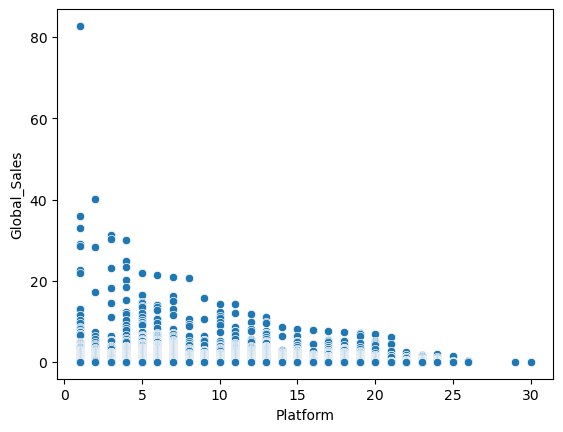

In [147]:
sns.scatterplot(data= df,x = 'Platform',y = 'Global_Sales')

<Axes: xlabel='Year', ylabel='Global_Sales'>

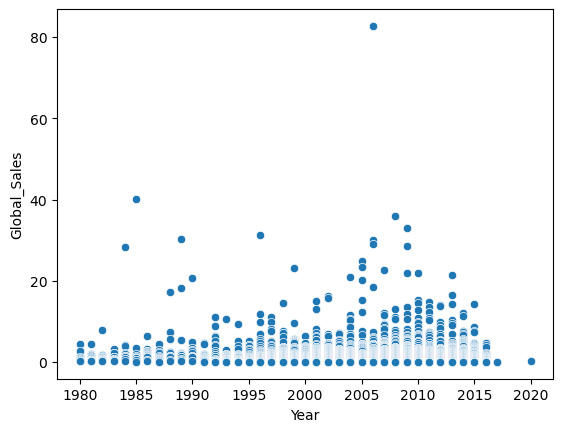

In [148]:
sns.scatterplot(data= df,x = 'Year',y = 'Global_Sales')

<Axes: xlabel='Publisher', ylabel='Global_Sales'>

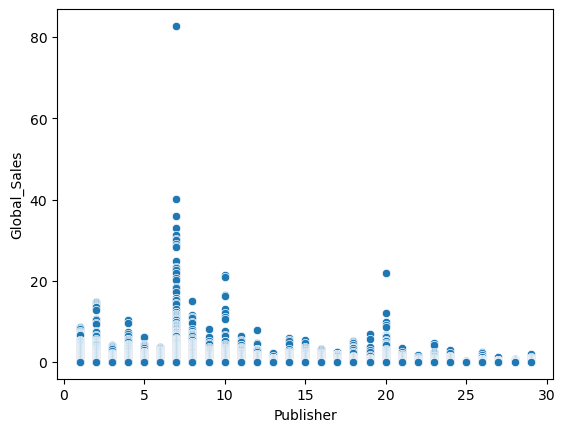

In [149]:
sns.scatterplot(data= df,x = 'Publisher',y = 'Global_Sales')

<Axes: xlabel='Genre', ylabel='Global_Sales'>

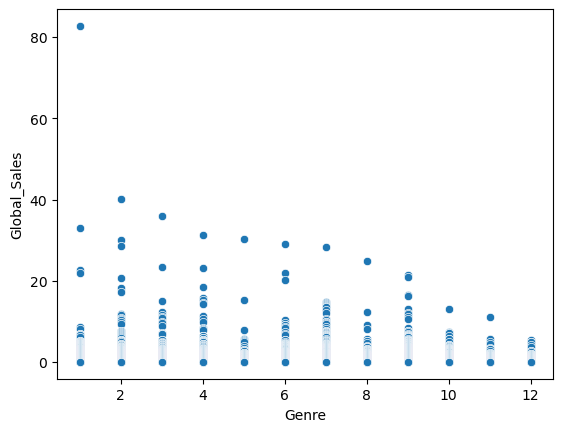

In [150]:
sns.scatterplot(data= df,x = 'Genre',y = 'Global_Sales')

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled[best_features],y,test_size= 0.3, random_state= 7)

In [152]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((8312, 4), (8312,), (3563, 4), (3563,))

In [153]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

In [154]:
lr_model = lr.fit(X_train,y_train)

In [155]:
print('Intercept: ',lr_model.intercept_)
print('Slope: ',lr_model.coef_)

Intercept:  0.6454310108288023
Slope:  [-0.16967742 -0.13469774 -0.0563715  -0.11313848]


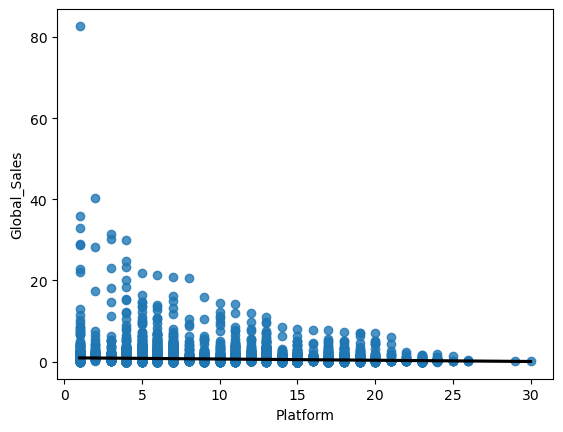

In [156]:
plot_OverallQual = sns.regplot(data = df,x='Platform',y='Global_Sales', line_kws={'color' : 'black', 'label' : '$y=%5.4sx+%5.5s$'%(lr_model.coef_[1],lr_model.intercept_)})

In [157]:
y_pred = lr_model.predict(X_test)

In [158]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test,y_pred)
print(mae)

0.7031144201417352


In [159]:
mse = metrics.mean_squared_error(y_test,y_pred)
print(mse)

4.5672301478146675


In [160]:
rmse = metrics.mean_squared_error(y_test,y_pred,squared=False)
print(rmse)

2.1371078933490155


I mean for a graph that goes up to 80 mullion sales for wii sports i think getting the prediction within 4.5 million copies sold is actualy not that bad... its not great but all things considered not bad either. I honestly expected it to be way worse than that.

___________________________________________________________________________________________________________________________________________________
___________________________________________________________________________________________________________________________________________________
___________________________________________________________________________________________________________________________________________________

In [162]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [163]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [164]:
df.dropna(subset=['Year', 'Publisher'], inplace= True)

In [165]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

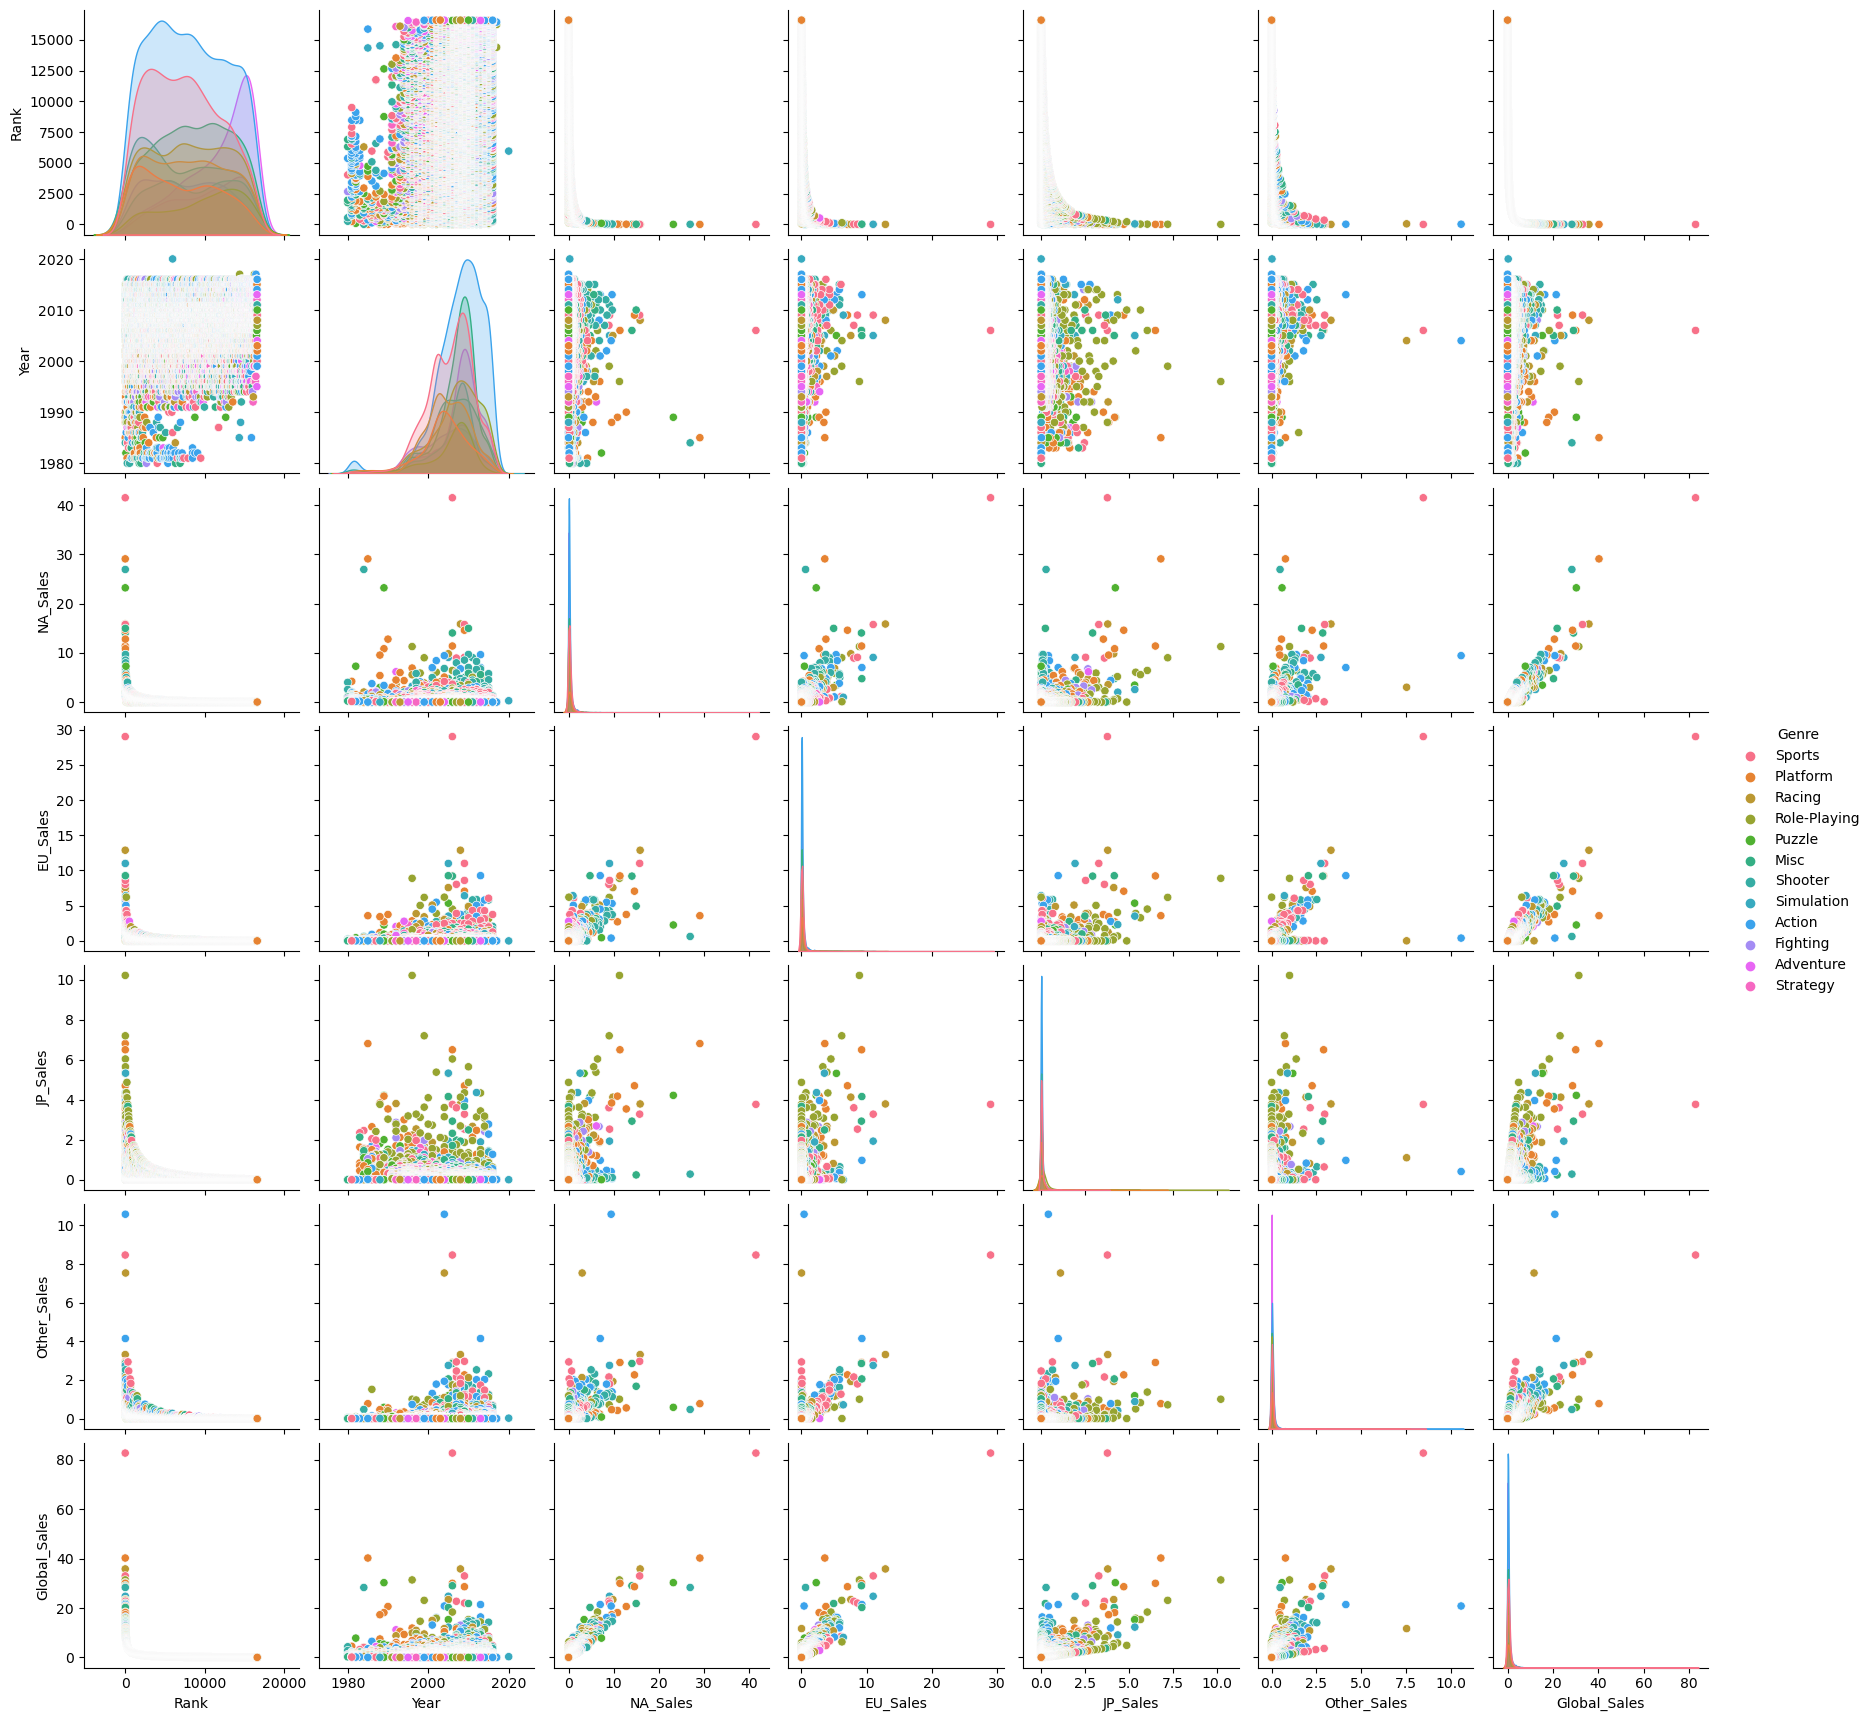

In [166]:
sns.pairplot(data=df, hue= 'Genre')

In [168]:
df = df.drop(columns=['Rank', 'Name', 'Platform', 'Year', 'Publisher'])

In [185]:
df.drop(index= 0, inplace= True)
df.head()

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Platform,29.08,3.58,6.81,0.77,40.24
2,Racing,15.85,12.88,3.79,3.31,35.82
3,Sports,15.75,11.01,3.28,2.96,33.00
4,Role-Playing,11.27,8.89,10.22,1.00,31.37
5,Puzzle,23.20,2.26,4.22,0.58,30.26


In [186]:
X = df.drop(columns=['Genre', 'Global_Sales'])
Y = df['Genre']


In [187]:
Y

1            Platform
2              Racing
3              Sports
4        Role-Playing
5              Puzzle
             ...     
16593        Platform
16594         Shooter
16595          Racing
16596          Puzzle
16597        Platform
Name: Genre, Length: 16290, dtype: object

In [188]:
X.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,29.08,3.58,6.81,0.77
2,15.85,12.88,3.79,3.31
3,15.75,11.01,3.28,2.96
4,11.27,8.89,10.22,1.00
5,23.20,2.26,4.22,0.58


In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13032, 4), (3258, 4), (13032,), (3258,))

In [177]:
from sklearn import tree

In [190]:
clf = tree.DecisionTreeClassifier()

In [191]:
clf = clf.fit(X_train, y_train)

In [192]:
predicted = clf.predict(X_test)
predicted

array(['Action', 'Fighting', 'Shooter', ..., 'Simulation', 'Role-Playing',
       'Adventure'], dtype=object)

In [193]:
clf.score(X_test, y_test)

0.19337016574585636

Well thats pretty bad the tree can't accuratly predict from the sales in each country what Genre of game it is.

In [256]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [257]:
df.dropna(subset=['Year', 'Publisher'], inplace= True)
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
sns.pairplot(data=df, hue= 'Publisher')

Lol thats bad i don't recomend you run that it is useless and also massive which makes navigating the file migrane inducing plus it takes like 13 minutes to do so. if you do it anyway don't say I didn't warn you. BAD PAIRPLOT. NO RUN.

In [258]:
df = df.drop(columns=['Rank', 'Name', 'Platform', 'Year', 'Genre'])

In [259]:
df.drop(index= 0, inplace= True)
df.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Nintendo,23.20,2.26,4.22,0.58,30.26


In [260]:
X = df.drop(columns=['Publisher'])
Y = df['Publisher']

In [261]:
Y

1          Nintendo
2          Nintendo
3          Nintendo
4          Nintendo
5          Nintendo
            ...    
16593         Kemco
16594    Infogrames
16595    Activision
16596      7G//AMES
16597       Wanadoo
Name: Publisher, Length: 16290, dtype: object

In [262]:
X.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37
5,23.20,2.26,4.22,0.58,30.26


In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13032, 5), (3258, 5), (13032,), (3258,))

In [264]:
clf = tree.DecisionTreeClassifier()

In [265]:
clf = clf.fit(X_train, y_train)

In [266]:
predicted = clf.predict(X_test)
predicted

array(['Electronic Arts', 'Ubisoft', 'Electronic Arts', ..., 'Nintendo',
       'Nintendo', 'Electronic Arts'], dtype=object)

In [267]:
clf.score(X_test, y_test)

0.12492326580724371

Also awful





______________________________________________________________________________________________________________________________________________________

In [218]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [219]:
df.dropna(subset=['Year', 'Publisher'], inplace= True)
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

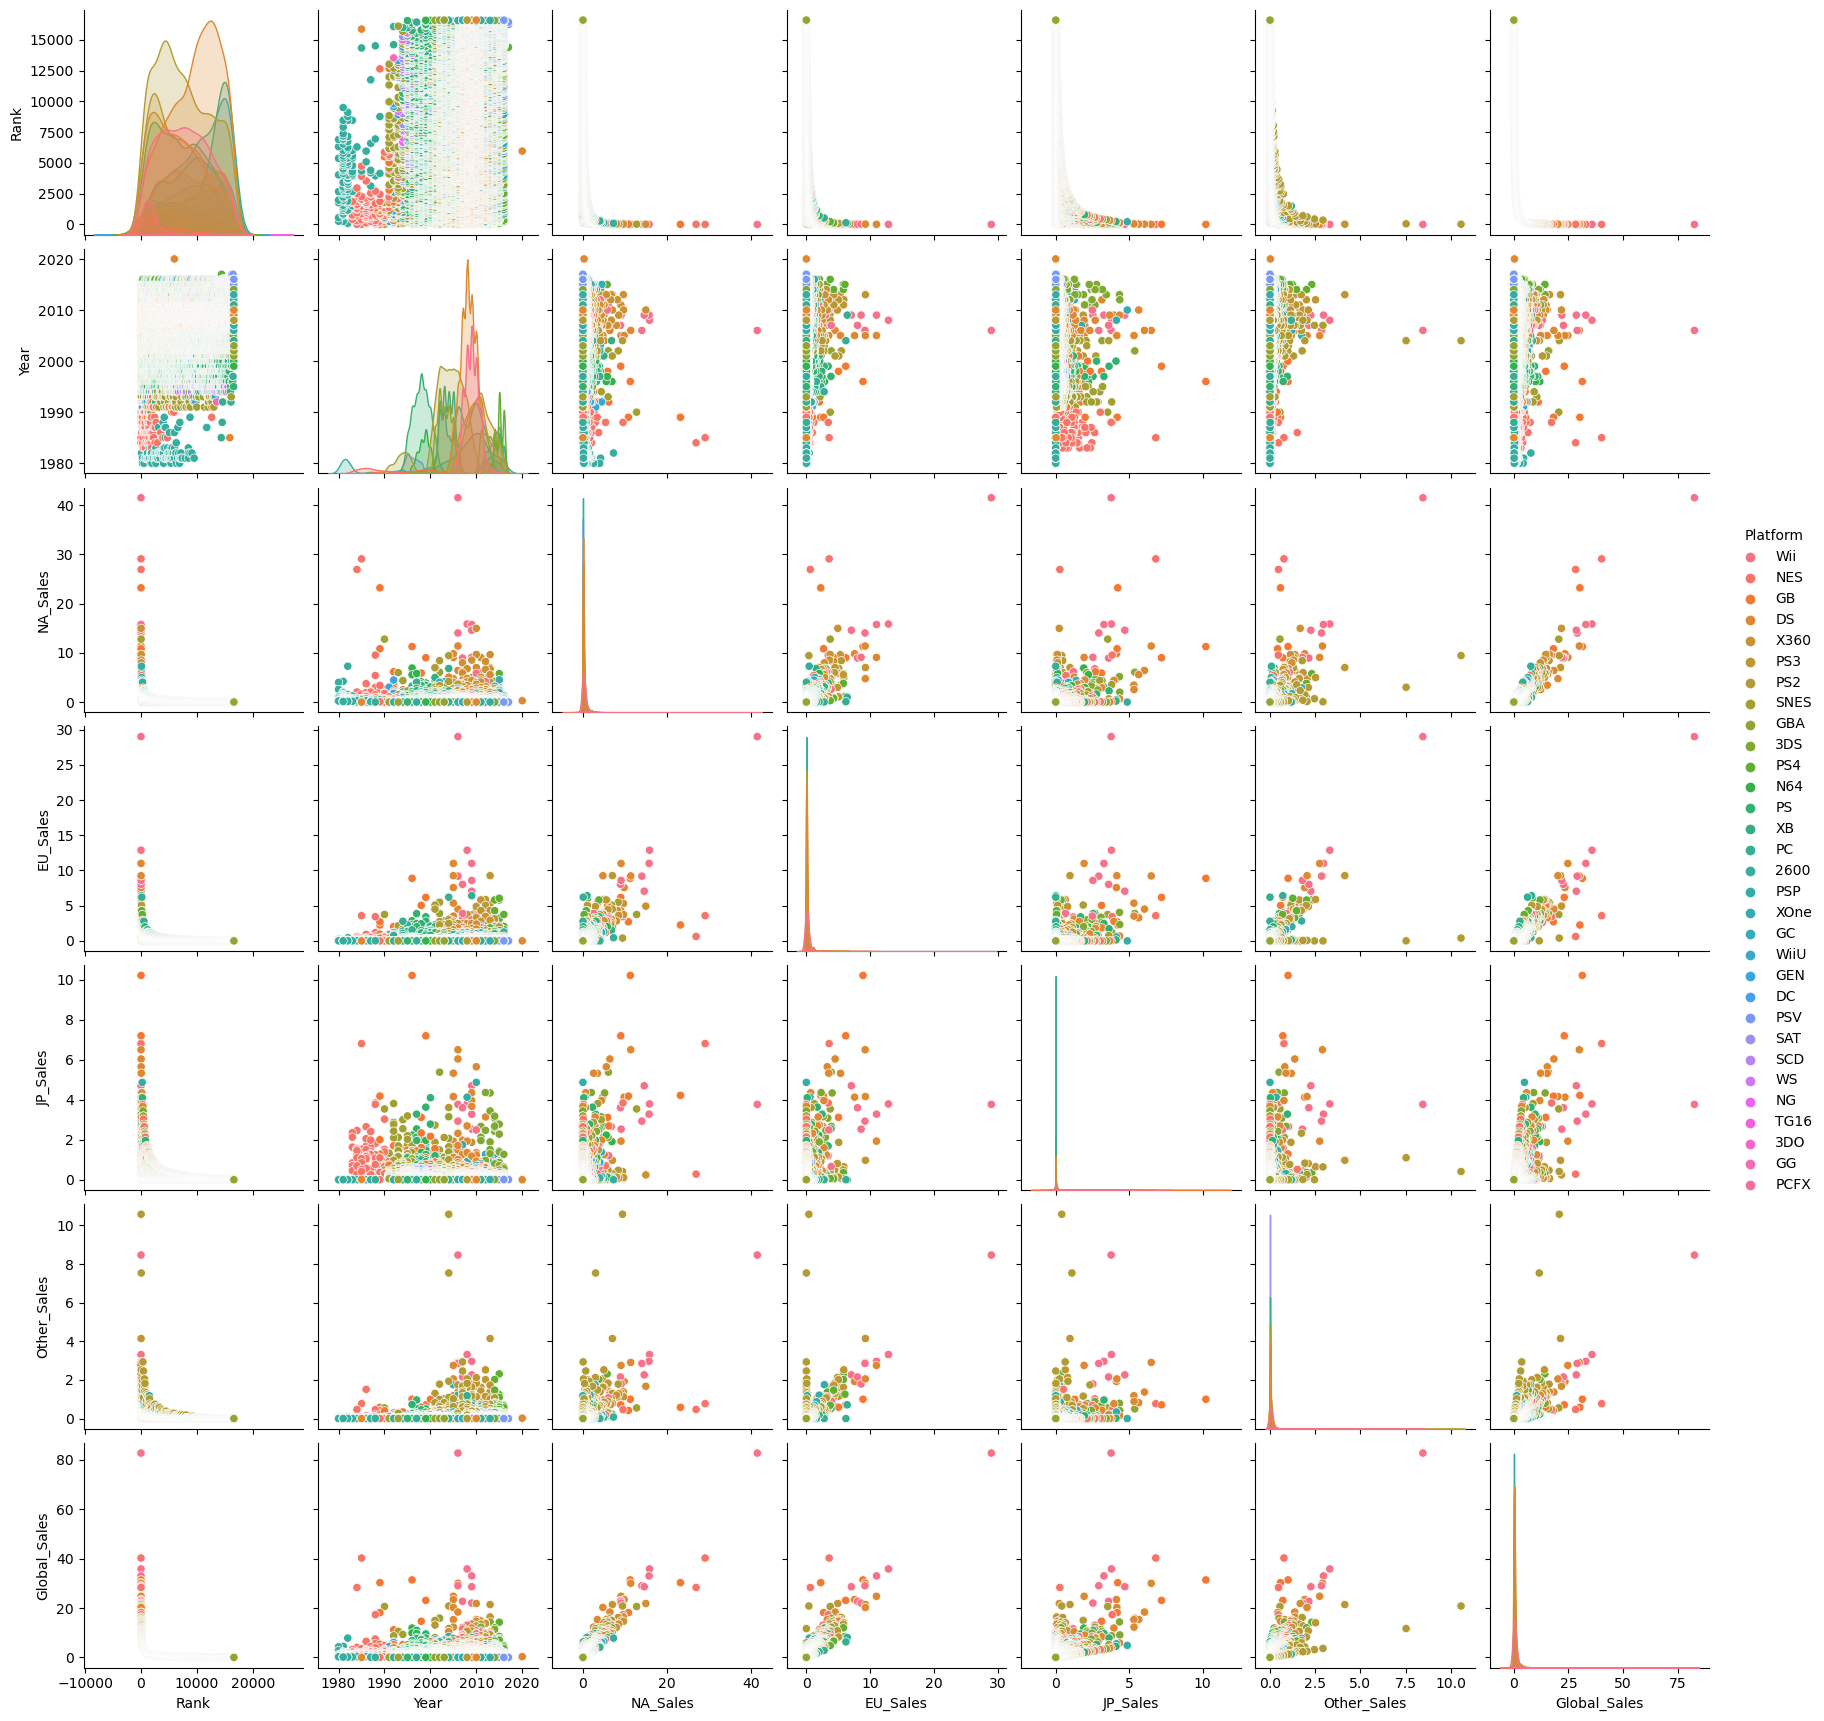

In [210]:
sns.pairplot(data=df, hue= 'Platform')

better

In [283]:
df.drop(index= 0, inplace= True)
df.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,NES,1985.0,2.0,7.0,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008.0,3.0,7.0,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009.0,1.0,7.0,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996.0,4.0,7.0,11.27,8.89,10.22,1.00,31.37
5,6,GB,1989.0,5.0,7.0,23.20,2.26,4.22,0.58,30.26


In [221]:
df = df.drop(columns=['Rank', 'Name', 'Publisher', 'Year', 'Genre'])

In [222]:
X = df.drop(columns=['Platform'])
Y = df['Platform']

In [223]:
Y

1        NES
2        Wii
3        Wii
4         GB
5         GB
        ... 
16593    GBA
16594     GC
16595    PS2
16596     DS
16597    GBA
Name: Platform, Length: 16290, dtype: object

In [224]:
X.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,29.08,3.58,6.81,0.77,40.24
2,15.85,12.88,3.79,3.31,35.82
3,15.75,11.01,3.28,2.96,33.00
4,11.27,8.89,10.22,1.00,31.37
5,23.20,2.26,4.22,0.58,30.26


In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13032, 5), (3258, 5), (13032,), (3258,))

In [226]:
clf = tree.DecisionTreeClassifier()

In [227]:
clf = clf.fit(X_train, y_train)

In [228]:
predicted = clf.predict(X_test)
predicted

array(['DS', 'PS3', 'DS', ..., '3DS', 'PSP', 'PS2'], dtype=object)

In [229]:
clf.score(X_test, y_test)

0.4438305709023941

Well its better than all the others by a massive degree but it's still bad.

Ok ima get a little goofy with this next one

I am going to use the code from the regression to make all the catagorical data numbers again and then try and use them with the decision tree as well

In [285]:
df = df.drop(columns=['Rank'])

In [286]:
X = df.drop(columns=['Platform'])
Y = df['Platform']

In [287]:
Y

1        NES
2        Wii
3        Wii
4         GB
5         GB
        ... 
16581    Wii
16584     GC
16586     DS
16591     PC
16595    PS2
Name: Platform, Length: 11838, dtype: object

In [288]:
X.head()

,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,1985.0,2.0,7.0,29.08,3.58,6.81,0.77,40.24
2,2008.0,3.0,7.0,15.85,12.88,3.79,3.31,35.82
3,2009.0,1.0,7.0,15.75,11.01,3.28,2.96,33.00
4,1996.0,4.0,7.0,11.27,8.89,10.22,1.00,31.37
5,1989.0,5.0,7.0,23.20,2.26,4.22,0.58,30.26


In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9470, 8), (2368, 8), (9470,), (2368,))

In [290]:
clf = tree.DecisionTreeClassifier()

In [291]:
clf = clf.fit(X_train, y_train)

In [292]:
predicted = clf.predict(X_test)
predicted

array(['Wii', 'PS2', 'X360', ..., 'PSV', 'DS', 'GBA'], dtype=object)

In [293]:
clf.score(X_test, y_test)

0.504222972972973

Well I think I can officially say that you cannot predict the Genre Publisher or Platform of a game base on their sales data. 